# Table 1 and 2

In [1]:
from Fast_connectCloud import connector
from GoogleDrivePy.google_drive import connect_drive
import pandas as pd
import numpy as np

gs = connector.open_connection(online_connection = False,
                              path_credential = 
                               '/Users/thomas/Google Drive/Projects/Client_Oauth/Google_auth/'
                              )
service_gd = gs.connect_remote(engine = 'GS')
gdr = connect_drive.connect_drive(service_gd['GoogleDrive'])
service = gs.connect_remote('GCP')
from GoogleDrivePy.google_platform import connect_cloud_platform
project = 'valid-pagoda-132423'
gcp = connect_cloud_platform.connect_console(project = project, 
                                             service_account = service['GoogleCloudP'])   

Service Google Drive and Docs, Sheet are now connected. 
Service Google Drive is stored as <googleapiclient.discovery.Resource object at 0x11e5e52d0> and accessible with "drive" 
Service Google Doc is stored as <googleapiclient.discovery.Resource object at 0x11e69e050> and accessible with "doc" 
Service Google Sheet is stored as <googleapiclient.discovery.Resource object at 0x11e7c5ed0>and accessible with "sheet"
Service account storage and Bigquery are now connected. 
Service account storage is stored as <google.cloud.storage.client.Client object at 0x11e7cc190> and accessible with "Storage_account" 
Service account Bigquery is stored as <google.cloud.bigquery.client.Client object at 0x11e7cc6d0> and accessible with "bigquery_account"


# Load data

## parameters

In [2]:
aggregation_param = 'geocode4_corr'
decile = 6

## Load cityname_and_code from Google Spreadsheet

Feel free to add description about the dataset or any usefull information.

Profiling will be available soon for this dataset

In [3]:
### Please go here https://docs.google.com/spreadsheets/d/1fIziz-Xt99-Rj6NLm52-i6jScOLXgAY20KJi8k3DruA
### To change the range

sheetid = '1fIziz-Xt99-Rj6NLm52-i6jScOLXgAY20KJi8k3DruA'
sheetname = 'final'

df_cityname_and_code = gdr.upload_data_from_spreadsheet(sheetID = sheetid,
sheetName = sheetname,
	 to_dataframe = True)
df_cityname_and_code.head()

,extra_coda,geocode4_corr,citycn,cityen,citycn_correct,cityen_correct,Province_cn,Province_en
1,1100,1101,北京,Beijing,北京,Beijing,北京市,Beijing
2,1101,1101,北京,Beijing,北京,Beijing,北京市,Beijing
3,1102,1101,北京,Beijing,北京,Beijing,北京市,Beijing
4,1200,1201,天津,Tianjin,天津,Tianjin,天津市,Tianjin
5,1201,1201,天津,Tianjin,天津,Tianjin,天津市,Tianjin


## Load TCZ_list_china from Google Spreadsheet

Feel free to add description about the dataset or any usefull information.

Profiling will be available soon for this dataset

In [4]:
### Please go here https://docs.google.com/spreadsheets/d/15bMeS2cMfGfYJkjuY6wOMzcAUWZNRGpO03hZ8rpgv0Q
### To change the range

sheetid = '15bMeS2cMfGfYJkjuY6wOMzcAUWZNRGpO03hZ8rpgv0Q'
sheetname = 'TCZ'

df_TCZ_list_china = gdr.upload_data_from_spreadsheet(sheetID = sheetid,
sheetName = sheetname,
	 to_dataframe = True)
df_TCZ_list_china.head()

,Province,City,geocode4_corr,TCZ
1,Beijing,Beijing,1101,1
2,Tianjin,Tianjin,1201,1
3,Hebei,Shijiazhuang,1301,1
4,Hebei,Tangshan,1302,1
5,Hebei,Qinhuangdao,1303,0


## Load yearbook9813 from Google Spreadsheet

Feel free to add description about the dataset or any usefull information.

Profiling will be available soon for this dataset

We need this table for the table 0 -> Need year 2001

In [5]:
### Please go here https://docs.google.com/spreadsheets/d/15bMeS2cMfGfYJkjuY6wOMzcAUWZNRGpO03hZ8rpgv0Q
### To change the range


sheetid = '1NpfDQ6dz7knjZDPSjRz2QanVf7td3ujSQn7hD7Gxkow'
sheetname = 'yearbook'

yearbook9813 = (gdr.upload_data_from_spreadsheet(sheetID = sheetid,
sheetName = sheetname,
	 to_dataframe = True).loc[lambda x: x['year'].isin(['2003','2004',
                                                       '2005', '2006',
                                                       '2007', '2008',
                                                       '2009', '2010'])]
                .drop(columns = ['代码',
                  '简称', 
                  "[Envirct06:工业二氧化硫去除量][单位:吨]",
                 '[Envirct08:工业烟尘去除量][单位:吨]',
                 '[Envirct09:工业烟尘排放量][单位:吨]']
               )
                .rename(columns = {'[Envirct07:工业二氧化硫排放量][单位:吨]':
                                   'tso2'})
                .assign(tso2 = lambda x: pd.to_numeric(x['tso2'],
                                                         errors = 'coerce'
                                                         )
                                                         )
               )

## Paper dataset

In [6]:
query = (
          "SELECT * "
            "FROM China.SBC_pollution_China "

        )

df_final = gcp.upload_data_from_bigquery(query = query, location = 'US')

In [7]:
list_agg = df_final[aggregation_param].to_list()

## Pollution China 1998-2005

In [8]:
query = ("""SELECT SUM( tso2) sum_so2, year, citycode as geocode4_corr
FROM China.pollution_city_cic4_china
GROUP BY year, citycode
"""
        )
df_pol = (gcp.upload_data_from_bigquery(query = query, location = 'US')
          .loc[lambda x: ~x['geocode4_corr'].isna()]
      .assign(geocode4_corr = lambda x: 
              x['geocode4_corr'].astype(int).astype('str')
             )
         )
          

In [9]:
### Zhaoruili data
sheetid = '1kSyGnkWOwoGVe1PgsQUGoWYO3DB8p9fgVh_VE6ilBt8'
sheetname = 'SO2_emission'

df_TCZ_SO2_Zhaoruili= gdr.upload_data_from_spreadsheet(sheetID = sheetid,
sheetName = sheetname,
	 to_dataframe = True).apply(lambda x: pd.to_numeric(x, errors ='ignore'))

## Compute Herfhindal: proxy Size

$$
H=\sum_{i=1}^{N} s_{i}^{2}
$$

where $s_i$ is the market share of industry[city] $i$ in a city [industry], and $N$ is the number of firms. 

We proceed as follow:
- Step 1: Compute the share [output, capital, employment] by city-industry: `market_share_cit`
- Step 2: compute the sum of squared market share by industry[city]: `Herfindahl_agg_t`
- Step 3: Compute the average across time: `Herfindahl_agg`
- Step 4: Compute the deciles of step 3: `decile_herfhindal_agg`
    - Low decile implies a low concentration within sectors
    - High decile implies a high concentration within sectors

In [10]:
query = """
WITH sum_cit AS (
  SELECT geocode4_corr, cic as industry, sum(output) as sum_o_cit, year
  FROM China.asif_firm_china 
  WHERE year >= 2002 AND year <= 2007
  AND output > 0 
    AND fa_net > 0 
    AND employment > 0 
  GROUP BY geocode4_corr, cic, year
) 
SELECT * 
FROM 
  (WITH sum_agg_t AS (
    SELECT {0}, SUM(sum_o_cit) as sum_o_agg_t, year
    FROM sum_cit
    WHERE year >= 2002 AND year <= 2007
    GROUP BY year, {0}
)
SELECT *
FROM
  (WITH ms_cit AS (
    SELECT  sum_cit.industry, sum_cit.geocode4_corr, sum_cit.year,
    sum_cit.sum_o_cit/NULLIF(sum_agg_t.sum_o_agg_t, 0) as market_share_cit
    FROM sum_cit
    LEFT JOIN sum_agg_t
ON (
sum_cit.year = sum_agg_t.year AND 
sum_cit.{0} = sum_agg_t.{0}
)
)
SELECT *
FROM
  (WITH agg_1 AS (
SELECT {0}, SUM(POW(market_share_cit, 2)) as Herfindahl_agg_t,
year
FROM ms_cit
GROUP BY year, {0}
ORDER BY year, {0} 
)
SELECT *
FROM (
SELECT {0},
AVG(Herfindahl_agg_t) as Herfindahl_agg
FROM agg_1
GROUP BY {0}
ORDER BY {0}
)

)))
"""
df_herfhindal = (gcp.upload_data_from_bigquery(
    query = query.format(aggregation_param),
                                         location = 'US')
                 .loc[lambda x: x[aggregation_param].isin(list_agg)]
                )

In [11]:
df_herfhindal_final = (df_final.merge(df_herfhindal,
                                     on=[aggregation_param],
                                     how='left',
                                     indicator=True
                                     )
                       .assign(
                       decile_herfhindal = lambda x:
                           pd.qcut(x['Herfindahl_agg'],10, labels=False),
                       mean_herfhindal= 
                           lambda x: np.where(
                               x["Herfindahl_agg"] > 
                               x["Herfindahl_agg"].drop_duplicates().mean(),
                               1,0
                           ),
                       third_herfhindal= 
                           lambda x: np.where(
                               x["Herfindahl_agg"] >
                               (x["Herfindahl_agg"]
                                .drop_duplicates()
                                .quantile([.75])
                                .values[0]),
                               1,0
                           ),
                    concentrated_city = lambda x:np.where(
                    x['decile_herfhindal'] > decile,
                           'Concentrated city',"No Concentrated city"
                    )
                       )[['geocode4_corr',
                                           'concentrated_city']].drop_duplicates(
    subset = 'geocode4_corr')
                .assign(geocode4_corr = lambda x: 
                        x['geocode4_corr'].astype('str'))
                      )

## SOE vs Private

We proceed as follow:
- Step 1: Compute the share [output, capital, employment] by industry[city], ownership (SOE/PRIVATE): `Share_X_agg_o`
- ~Step 2: Compute dummy when share SOE above share domestic by industry[city]~
- Step 3: Compute decile by industry[city]-ownership
    - Note,  high decile in SOE means the industry[city] has relatively high share of SOE output, but not in absolule value as in step 2. A decile 9 in SOE can be a decile 2 or 3 in Domestic

In [12]:
query_share_ = """ 
WITH sum_agg_o AS (
  SELECT 
    case WHEN ownership = '{2}' THEN '{2}' ELSE '{3}' END AS OWNERSHIP, 
    SUM(output / 10000000) as output_agg_o, 
    SUM(fa_net / 10000000) as fa_net_agg_o, 
    SUM(employment / 100000) as employment_agg_o,
    {1} as {0}
  FROM 
    China.asif_firm_china 
  WHERE 
    year >= 2002 
    AND year <= 2007 
    AND output > 0 
    AND fa_net > 0 
    AND employment > 0 
  GROUP BY 
    OWNERSHIP, 
    {0}
) 
SELECT 
  * 
FROM 
  (
    WITH sum_agg AS(
      SELECT 
        SUM(output_agg_o) as output_agg, 
        SUM(fa_net_agg_o) as fa_net_agg, 
        SUM(employment_agg_o) as employment_agg, 
        {0} AS {0}_b
      FROM 
        sum_agg_o 
      GROUP BY 
        {0}
    ) 
    SELECT 
      * 
    FROM 
      (
        WITH share_agg_o AS(
          SELECT 
            OWNERSHIP, 
            output_agg_o / output_agg AS share_output_agg_o, 
            fa_net_agg_o / fa_net_agg AS share_fa_net_agg_o, 
            employment_agg_o / employment_agg AS share_employement_agg_o, 
            {0}
          FROM 
            sum_agg_o 
            LEFT JOIN sum_agg ON sum_agg_o.{0} = sum_agg.{0}_b 
        ) 
        SELECT 
        {0},
        OWNERSHIP,  
        share_output_agg_o,
        share_fa_net_agg_o,
        share_employement_agg_o
        FROM share_agg_o
        WHERE OWNERSHIP = '{2}'
        )
        )
"""
OWNERSHIP = 'SOE'
counterpart = 'PRIVATE'

df_share_soe= query_share_.format(aggregation_param,
                                             aggregation_param,
                                             OWNERSHIP,
                                            counterpart)
    
df_share_soe = (gcp.upload_data_from_bigquery(query = df_share_soe,
                                         location = 'US')
                    .loc[lambda x: x[aggregation_param].isin(list_agg)]
                   )
df_share_soe.shape 

(228, 5)

# Table 1

In [13]:
#### If industry, we need to use out_share_SOE, cap_share_SOE,lab_share_SOE
##### Output share already computed in the paper's table for industry but not
##### for city, in the later case, we use the data from ASIF
decile =6

if aggregation_param== 'industry':
    out = "out_share_SOE"
    cap = "cap_share_SOE"
    emp = "lab_share_SOE"
else:
    out = "share_output_agg_o"
    cap = "share_fa_net_agg_o"
    emp = "share_employement_agg_o"
    
df_final_SOE = (df_final.merge(
    df_share_soe,
    on = [aggregation_param],
    how = 'left',
    indicator = True
)
                .assign(
                       output = lambda x:
                           pd.qcut(x[out],10, labels=False),
                       capital = lambda x:
                           pd.qcut(x[cap],10, labels=False),
                       employment = lambda x:
                           pd.qcut(x[emp],10, labels=False),
                       mean_output = lambda x:np.where(
                    x[out] > x[out].drop_duplicates().mean(),
                           1,0
                       ),
                    mean_capital = lambda x:np.where(
                    x[cap] > x[cap].drop_duplicates().mean(),
                           1,0
                       ),
                    mean_employment = lambda x:np.where(
                    x[emp] > x[emp].drop_duplicates().mean(),
                           1,0
                       ),
                    soe_city = lambda x:np.where(
                    x['output'] > decile,
                           'SOE dominated',"No SOE dominated"
                       )
                    
                    )
                .drop(columns = '_merge')[['geocode4_corr',
                                           'output',
                                           'TCZ_c',
                                          'soe_city',
                                          'target_c']].drop_duplicates(
    subset = 'geocode4_corr')
            .assign(geocode4_corr = lambda x: 
                        x['geocode4_corr'].astype('str'))
                

)
df_final_SOE['soe_city'].value_counts()

No SOE dominated    147
SOE dominated        81
Name: soe_city, dtype: int64

In [14]:
df_final_SOE_table2 = (df_final.merge(
    df_share_soe,
    on = [aggregation_param],
    how = 'left',
    indicator = True
)
                .assign(
                       output = lambda x:
                           pd.qcut(x[out],10, labels=False),
                       capital = lambda x:
                           pd.qcut(x[cap],10, labels=False),
                       employment = lambda x:
                           pd.qcut(x[emp],10, labels=False),
                       mean_output = lambda x:np.where(
                    x[out] > x[out].drop_duplicates().mean(),
                           1,0
                       ),
                    mean_capital = lambda x:np.where(
                    x[cap] > x[cap].drop_duplicates().mean(),
                           1,0
                       ),
                    mean_employment = lambda x:np.where(
                    x[emp] > x[emp].drop_duplicates().mean(),
                           1,0
                       ),
                    soe_city = lambda x:np.where(
                    x['output'] > decile,
                           'SOE dominated',"No SOE dominated"
                    )
                )[['geocode4_corr',
                   'Lower_location',
                   'Larger_location',
                   'TCZ_c',
     'share_output_agg_o',
     'share_fa_net_agg_o',
     'share_employement_agg_o']]
                       .drop_duplicates(subset = 'geocode4_corr')
                       .assign(geocode4_corr = lambda x: 
                        x['geocode4_corr'].astype('str'))
                      )
df_final_SOE_table2.shape

(228, 7)

### 1998-2000

- TCZ
- No TCZ
- SOE
- No SOE
- Full 

In [15]:
dic_ = {
    '1998-2001': [],
    '2002-2005': [],
    '2006-2010': [],
    'Target':[]
}

In [16]:
t1 = (df_TCZ_SO2_Zhaoruili
 .loc[lambda x: (~x['tcz'].isin(['OTHER']))
     & (x['year'].isin(['1998', '2000'#, '2001', '2005'
                       ]))]
 .set_index(['tcz', 'year'])
 .groupby(level = 0)
 .pct_change()
 .dropna()
)

dic_['1998-2001'].append(np.round(t1.loc['No_TCZ'].values[0][0], 2))
dic_['1998-2001'].append(np.round(t1.loc['TCZ'].values[0][0], 2))

In [17]:
t2 = (df_pol
 .merge(df_final_SOE, 
        how = 'right'
       )
 .assign(sum_so2 = lambda x: x['sum_so2'].fillna(0))
 .loc[lambda x: 
 (x['year'].isin(['1998', '2001']))
     ]
  .groupby(['soe_city',"year"])['sum_so2']
 .sum()
 .groupby(level = 0)
 .pct_change()
 .dropna()
)
dic_['1998-2001'].append(np.round(t2.loc['No SOE dominated'].values[0], 2))
dic_['1998-2001'].append(np.round(t2.loc['SOE dominated'].values[0], 2))

In [18]:
t3 = (df_TCZ_SO2_Zhaoruili
 .loc[lambda x: (~x['tcz'].isin(['OTHER']))
     & (x['year'].isin(['1998', '2000'#, '2001', '2005'
                       ]))]
 .set_index(['tcz', 'year'])
 .groupby(level = 1)
 .sum()
 .pct_change()
 .dropna()
)
dic_['1998-2001'].append(np.round(t3.loc[2000].values[0], 2))

### 2001-2005

- TCZ
- No TCZ
- SOE
- No SOE
- Full 

In [19]:
t1 = (df_TCZ_SO2_Zhaoruili
 .loc[lambda x: (~x['tcz'].isin(['OTHER']))
     & (x['year'].isin(['2001', '2005'#, '2001', '2005'
                       ]))]
 .set_index(['tcz', 'year'])
 .groupby(level = 0)
 .pct_change()
 .dropna()
)
dic_['2002-2005'].append(np.round(t1.loc['No_TCZ'].values[0][0], 2))
dic_['2002-2005'].append(np.round(t1.loc['TCZ'].values[0][0], 2))

In [20]:
t2 = (df_pol
 .merge(df_final_SOE, 
        how = 'right'
       )
 .assign(sum_so2 = lambda x: x['sum_so2'].fillna(0))
 .loc[lambda x: 
 (x['year'].isin(['2001', '2005']))
     ]
  .groupby(['soe_city',"year"])['sum_so2']
 .sum()
 .groupby(level = 0)
 .pct_change()
 .dropna()
)
dic_['2002-2005'].append(np.round(t2.loc['No SOE dominated'].values[0], 2))
dic_['2002-2005'].append(np.round(t2.loc['SOE dominated'].values[0], 2))

In [21]:
t3 = (df_TCZ_SO2_Zhaoruili
 .loc[lambda x: (~x['tcz'].isin(['OTHER']))
     & (x['year'].isin(['2001', '2005'#, '2001', '2005'
                       ]))]
 .set_index(['tcz', 'year'])
 .groupby(level = 1)
 .sum()
 .pct_change()
 .dropna()
)
dic_['2002-2005'].append(np.round(t3.loc[2005].values[0], 2))

### 2006-2010

In [22]:
t1 = (df_cityname_and_code
 .drop(
    columns=['citycn',
             'cityen',
             'citycn_correct',
             'cityen_correct',
             'Province_cn',
             'Province_en'])
 .merge(yearbook9813.rename(columns = {'geocode4_corr' : 'extra_coda'}))
 .drop(columns = ['extra_coda'])
 .merge(df_TCZ_list_china[['geocode4_corr', 'TCZ']], how = "left")
 .merge(df_final_SOE, on = ['geocode4_corr'],how = 'left')
 .apply(lambda x: pd.to_numeric(x, errors = 'coerce'))
 .assign(TCZ = lambda x: x['TCZ'].fillna(0))
 .replace({'TCZ': {0: 'No_TCZ', 1:'TCZ'}})
 .loc[lambda x: 
 (x['year'].isin(['2006', '2010']))]
  .groupby(['TCZ',"year"])['tso2']
 .sum()
 .groupby(level = 0)
 .pct_change()
 .dropna()
)

dic_['2006-2010'].append(np.round(t1.loc['No_TCZ'].values[0], 2))
dic_['2006-2010'].append(np.round(t1.loc['TCZ'].values[0], 2))

In [23]:
#### average target
t1 = (df_cityname_and_code
 .drop(
    columns=['citycn',
             'cityen',
             'citycn_correct',
             'cityen_correct',
             'Province_cn',
             'Province_en'])
 .merge(yearbook9813.rename(columns = {'geocode4_corr' : 'extra_coda'}))
 .drop(columns = ['extra_coda'])
 .merge(df_TCZ_list_china[['geocode4_corr', 'TCZ']], how = "left")
 .merge(df_final_SOE, on = ['geocode4_corr'],how = 'left')
 .apply(lambda x: pd.to_numeric(x, errors = 'coerce'))
 .assign(TCZ = lambda x: x['TCZ'].fillna(0))
 .replace({'TCZ': {0: 'No_TCZ', 1:'TCZ'}})
 .loc[lambda x: 
 (x['year'].isin(['2006']))]
  .groupby(['TCZ',"year"])['target_c']
.mean()
     )
dic_['Target'].append(-np.round(t1.loc['No_TCZ'].values[0], 2))
dic_['Target'].append(-np.round(t1.loc['TCZ'].values[0], 2))

In [24]:
t2 = (yearbook9813
 .merge(df_final_SOE, 
        how = 'right'
       )
 .assign(sum_so2 = lambda x: x['tso2'].fillna(0))
 .loc[lambda x: 
 (x['year'].isin(['2006', '2010']))
     ]
  .groupby(['soe_city',"year"])['tso2']
 .sum()
 .groupby(level = 0)
 .pct_change()
 .dropna()
)

dic_['2006-2010'].append(np.round(t2.loc['No SOE dominated'].values[0], 2))
dic_['2006-2010'].append(np.round(t2.loc['SOE dominated'].values[0], 2))

In [25]:
### target
t2 = (yearbook9813
 .merge(df_final_SOE, 
        how = 'right'
       )
 .assign(sum_so2 = lambda x: x['tso2'].fillna(0))
 .loc[lambda x: 
 (x['year'].isin(['2006']))
     ]
  .groupby(['soe_city',"year"])['target_c']
  .mean()
     )
dic_['Target'].append(-np.round(t2.loc['No SOE dominated'].values[0], 2))
dic_['Target'].append(-np.round(t2.loc['SOE dominated'].values[0], 2))

In [26]:
t3 = (df_cityname_and_code
 .drop(
    columns=['citycn',
             'cityen',
             'citycn_correct',
             'cityen_correct',
             'Province_cn',
             'Province_en'])
 .merge(yearbook9813.rename(columns = {'geocode4_corr' : 'extra_coda'}))
 .drop(columns = ['extra_coda'])
 .merge(df_TCZ_list_china[['geocode4_corr', 'TCZ']], how = "left")
 .merge(df_final_SOE, on = ['geocode4_corr'],how = 'left')
 .apply(lambda x: pd.to_numeric(x, errors = 'coerce'))
 .assign(TCZ = lambda x: x['TCZ'].fillna(0))
 .replace({'TCZ': {0: 'No_TCZ', 1:'TCZ'}})
 .loc[lambda x: 
 (x['year'].isin(['2006', '2010']))]
  .groupby(["year"])['tso2']
 .sum()
 #.groupby(level = 0)
 .pct_change()
 .dropna()
)
dic_['2006-2010'].append(np.round(t3.loc[2010], 2))
dic_['Target'].append(-.1)

In [27]:
for i in range(1, 19):
    try:
        os.remove("table_{}.pdf".format(i))
        os.remove("table_{}.tex".format(i))
        os.remove("table_{}.txt".format(i))
    except:
        pass

title = "SO2 reduction during the subsequent FYPs"
pd.DataFrame(dic_, index= ['No TCZ','TCZ',
                           'No Dominated SOE',
                           ' Dominated SOE',
                           'Full Sample']).to_latex('table_1.tex',
                                                    caption = title,
                                                    index=True,
                                                    label = "table_1",
                                                   float_format="{:,.2%}".format)

In [28]:
import sys, os
sys.path.insert(0,'..')
import functions.latex_beautify as lb

%load_ext autoreload
%autoreload 2

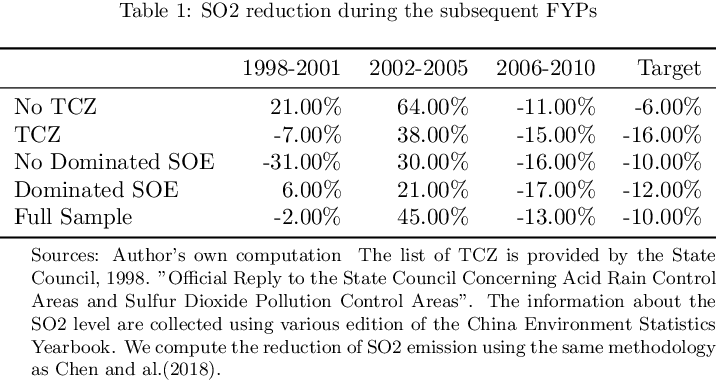

In [29]:

table_nte = """
Sources: Author's own computation \\
      The list of TCZ is provided by the State Council, 1998.
      "Official Reply to the State Council Concerning Acid Rain Control Areas
      and Sulfur Dioxide Pollution Control Areas".
      The information about the SO2 level are collected using various edition
      of the China Environment Statistics Yearbook.
      We compute the reduction of SO2 emission using the same methodology
      as Chen and al.(2018).
"""
lb.beautify_table(table_nte = table_nte,
                  name = 'table_1',
                  jupyter_preview  = True,
                  resolution = 150)

# Table 2

In [30]:
t0 = (df_final_SOE_table2[['share_output_agg_o', 'share_fa_net_agg_o',
       'share_employement_agg_o']]
      .mean()
      .reset_index()
      .set_index('index')
      .T
      .rename(index={0: 'Full sample'}))

In [31]:
t1 = df_final_SOE_table2.groupby('Lower_location')[['share_output_agg_o', 'share_fa_net_agg_o',
       'share_employement_agg_o']].mean()

In [32]:
t2 = df_final_SOE_table2.groupby('Larger_location')[['share_output_agg_o', 'share_fa_net_agg_o',
       'share_employement_agg_o']].mean()

In [33]:
t3 = df_final_SOE_table2.groupby('TCZ_c')[['share_output_agg_o', 'share_fa_net_agg_o',
       'share_employement_agg_o']].mean().rename(index={'No_TCZ': 'No TCZ'})

In [34]:
t4 = (df_final_SOE_table2
 .merge(df_herfhindal_final)
 .groupby('concentrated_city')[['share_output_agg_o', 'share_fa_net_agg_o',
       'share_employement_agg_o']]
 .mean()
)

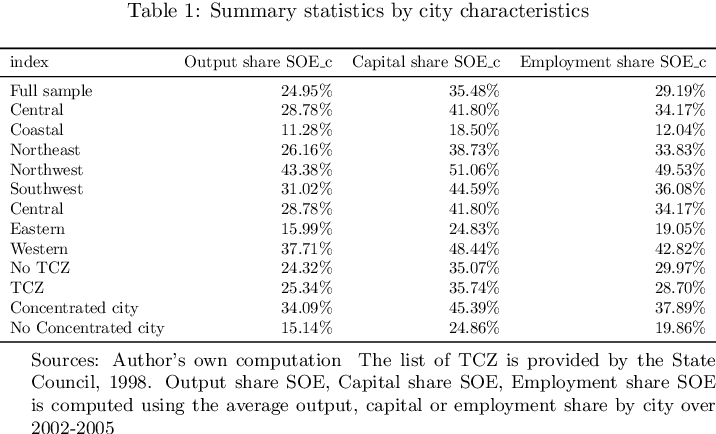

In [35]:
for i in range(1, 19):
    try:
        os.remove("table_{}.pdf".format(i))
        os.remove("table_{}.tex".format(i))
        os.remove("table_{}.txt".format(i))
    except:
        pass

title = "Summary statistics by city characteristics"
header = ["Output share SOE_c", "Capital share SOE_c","Employment share SOE_c"]
pd.concat([t0, t1, t2, t3, t4], axis = 0).to_latex(
    'table_1.tex',
    caption = title,
    index=True,
    label = "table_1",
    header = header,
    float_format="{:,.2%}".format)

table_nte = """
Sources: Author's own computation \\
      The list of TCZ is provided by the State Council, 1998.
      Output share SOE, Capital share SOE, Employment share SOE is computed 
      using the average output, capital or employment share by city over 2002-2005
      
"""
lb.beautify_table(table_nte = table_nte,
                  name = 'table_1',
                  jupyter_preview  = True,
                  resolution = 150)

# Create report

In [38]:
import os, time, shutil
from pathlib import Path

filename = '11_SBC_tables_sum_stat'
source = filename + '.ipynb'
source_to_move = filename +'.html'
path = os.getcwd()
parent_path = str(Path(path).parent)
path_report = "{}/Reports".format(parent_path)
dest = os.path.join(path_report, filename)+'_{}_.html'.format(
    aggregation_param)

os.system('jupyter nbconvert --no-input --to html {}'.format(source))

time.sleep(5)
shutil.move(source_to_move, dest)
for i in range(1, 19):
    try:
        os.remove("table_{}.pdf".format(i))
        os.remove("table_{}.tex".format(i))
        os.remove("table_{}.txt".format(i))
    except:
        pass